In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 98.8 MB/s eta 0:0

## Import modules

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pycaret.classification import *
%matplotlib inline
warnings.filterwarnings('ignore')

# Load the dataset

In [6]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# drop unecessary columns
df = df.drop(columns = ['id','Unnamed: 32'], axis=1)

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Exploratory data analysis

<Axes: xlabel='diagnosis', ylabel='count'>

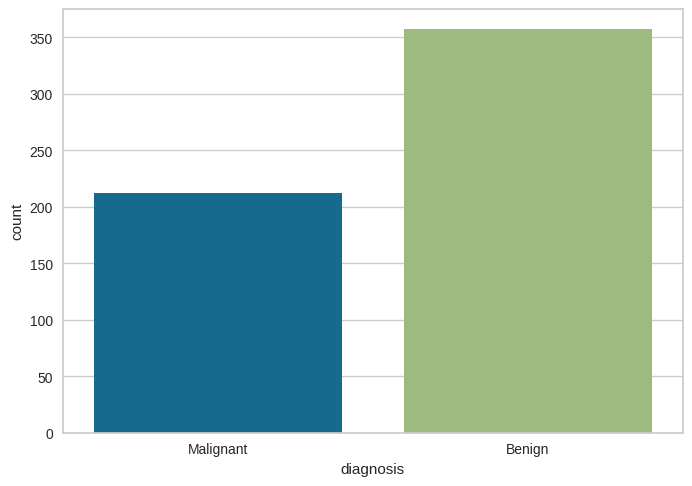

In [12]:
diagnosis_mapping = {'M': 'Malignant', 'B': 'Benign'}
df['diagnosis'] = df['diagnosis'].map(diagnosis_mapping)

# Plot the count using seaborn countplot
sns.countplot(data=df, x='diagnosis')

In [14]:
df_temp = df.drop(columns=['diagnosis'], axis=1)

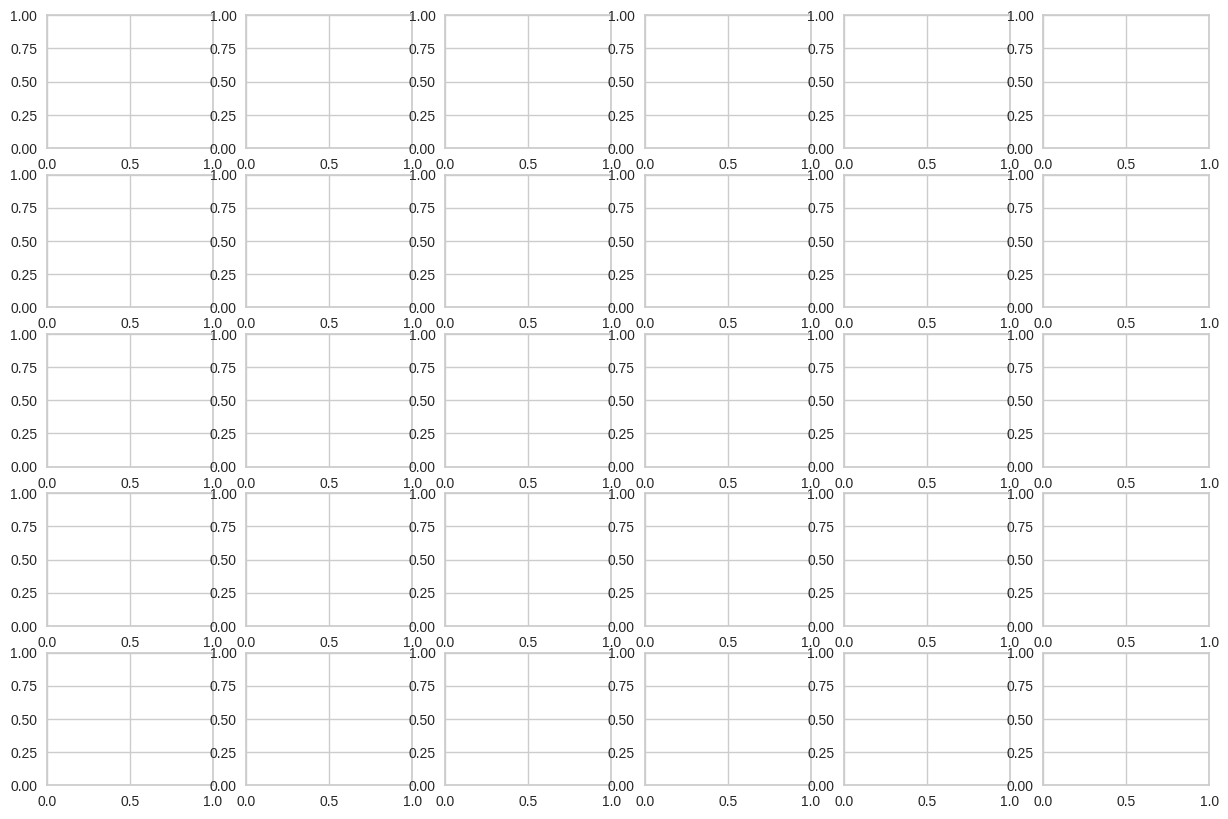

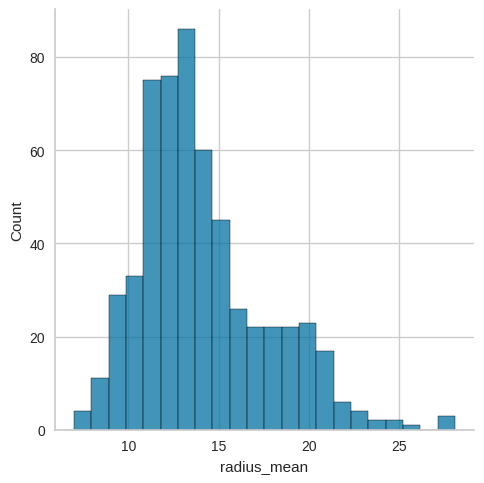

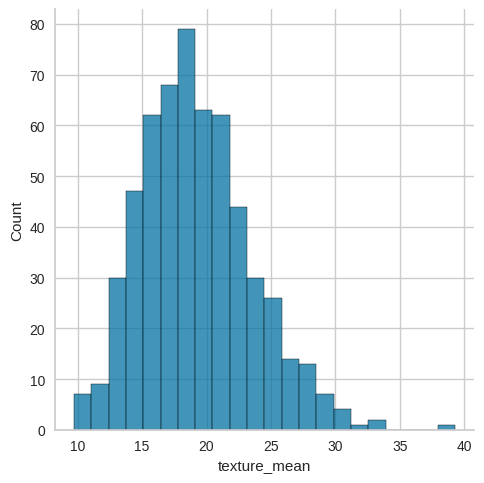

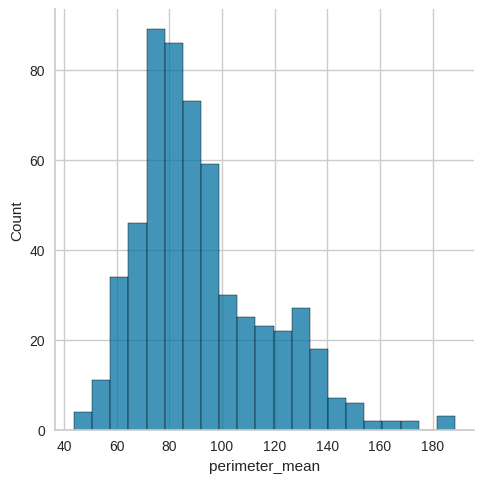

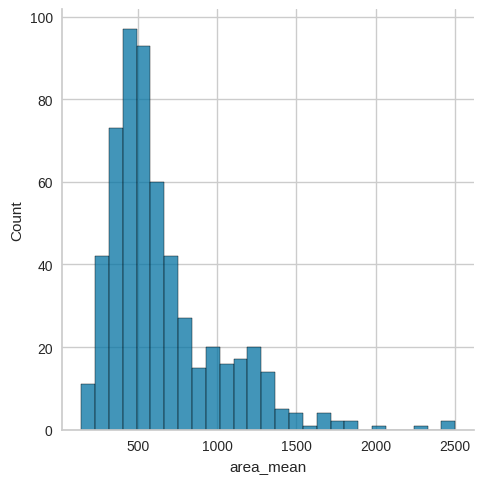

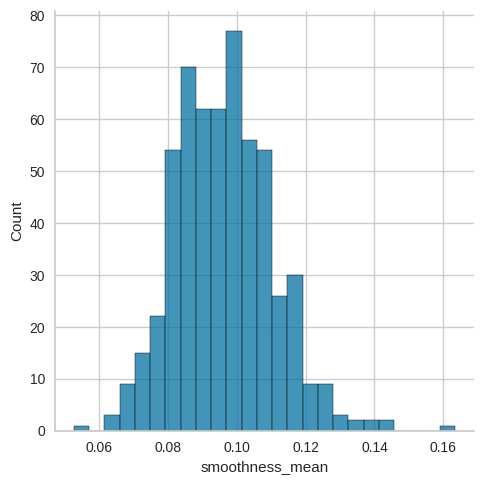

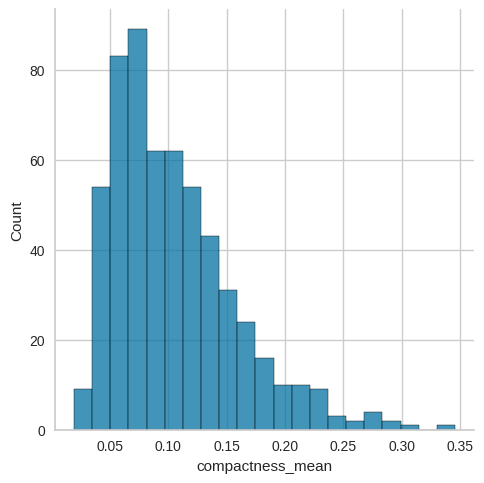

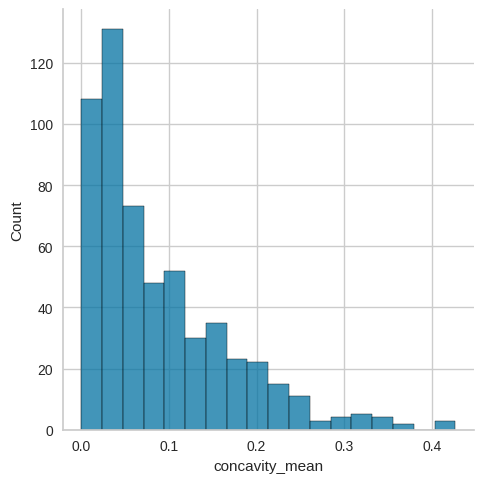

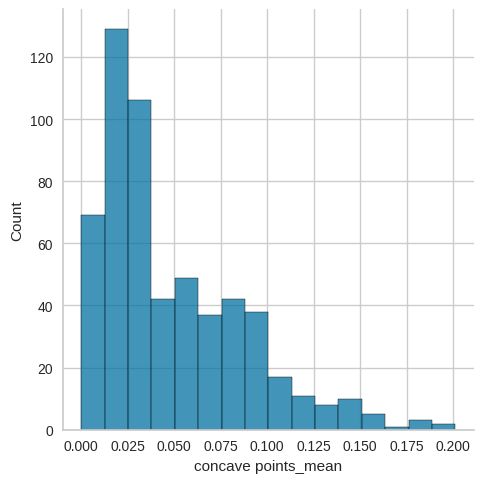

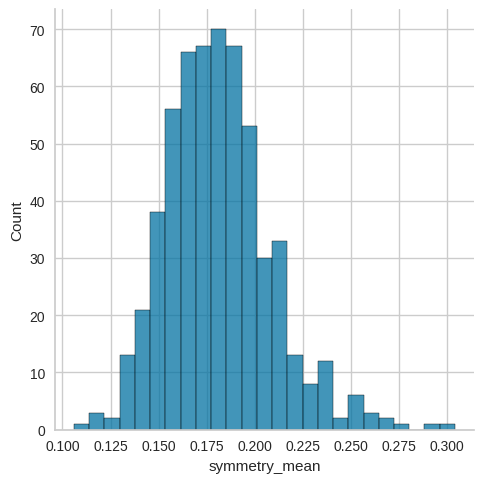

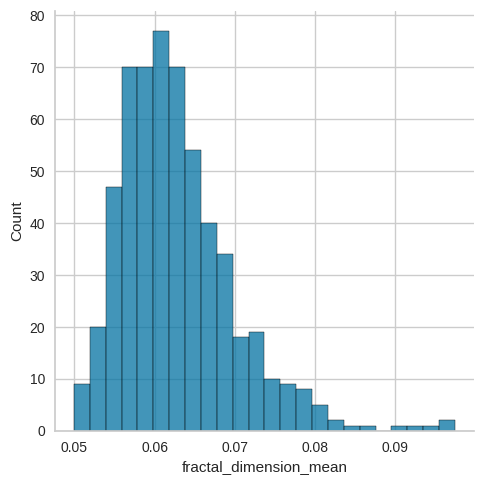

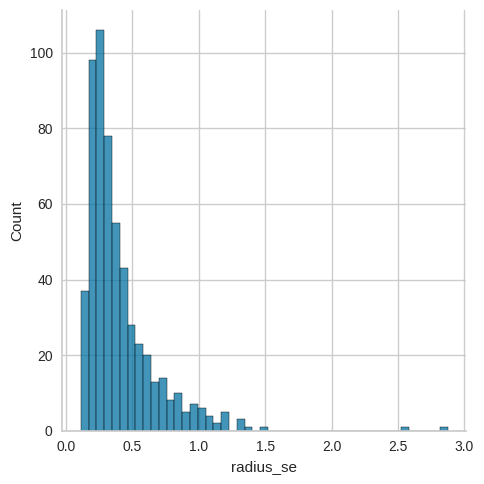

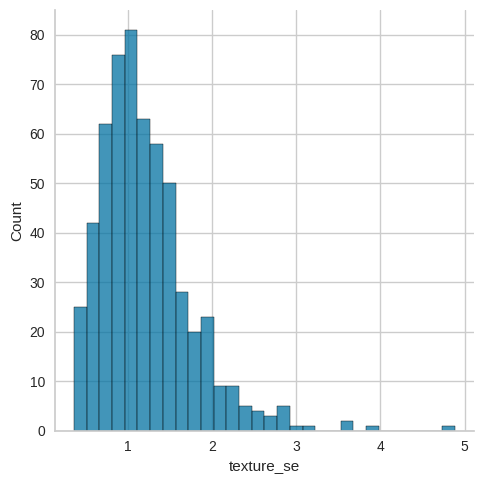

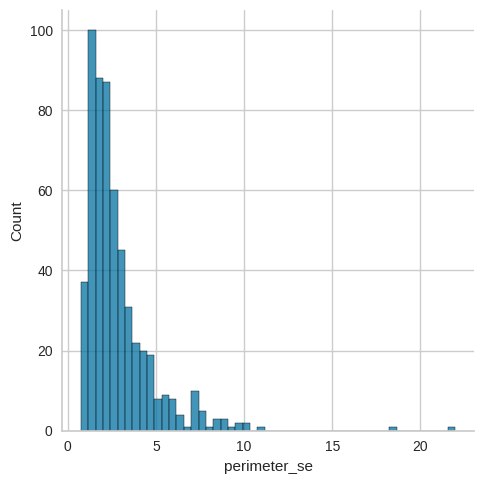

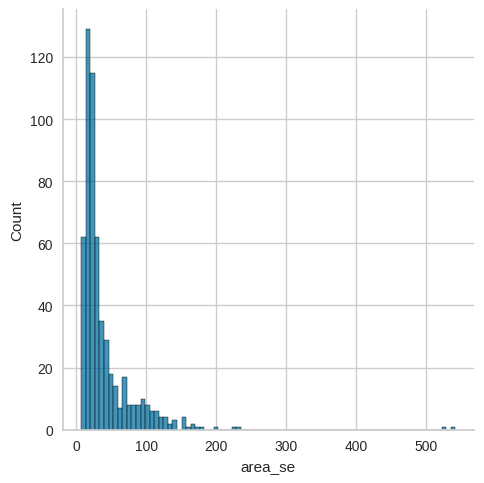

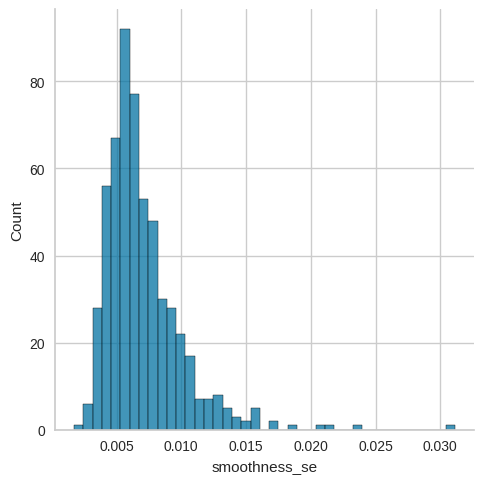

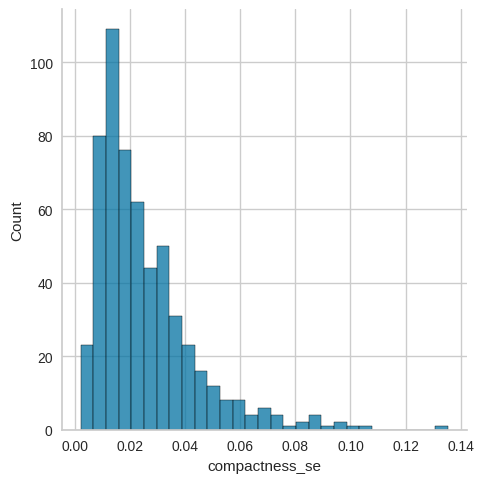

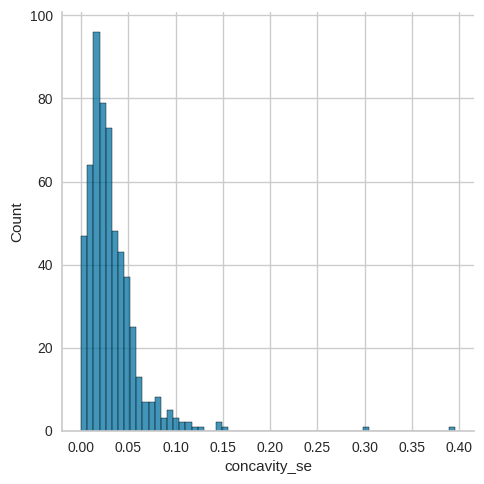

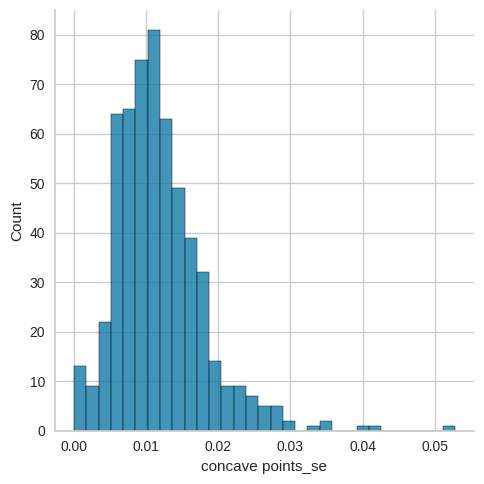

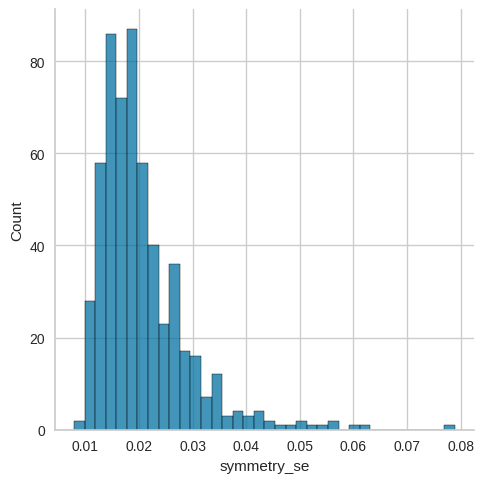

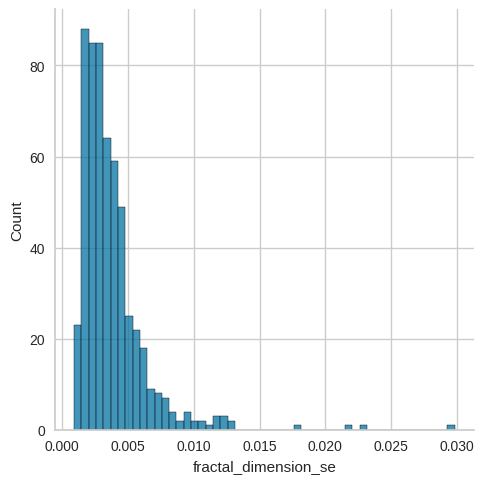

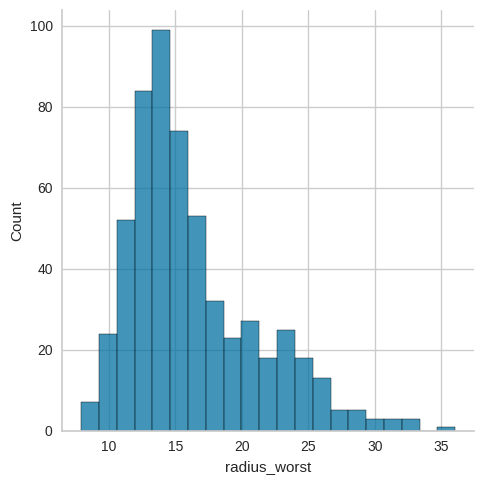

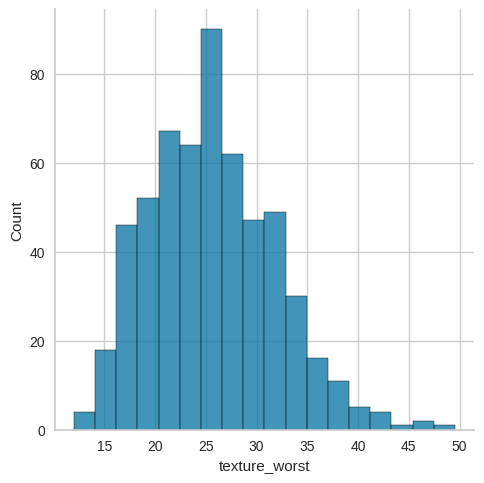

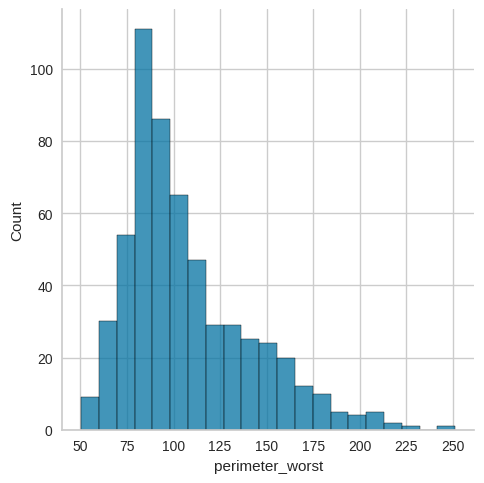

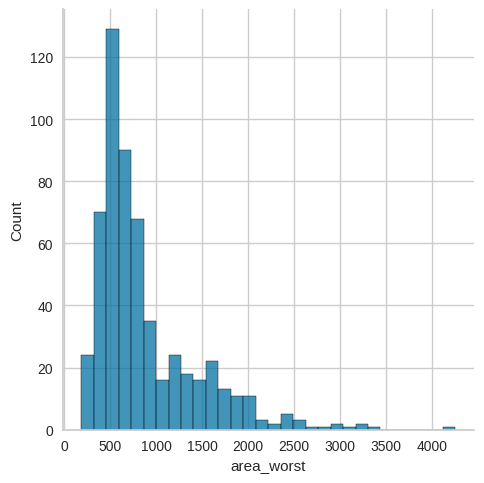

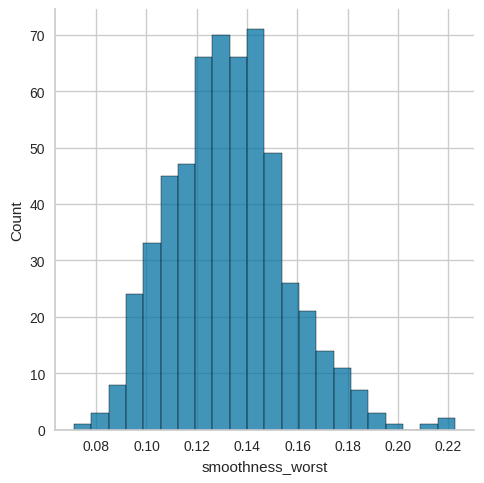

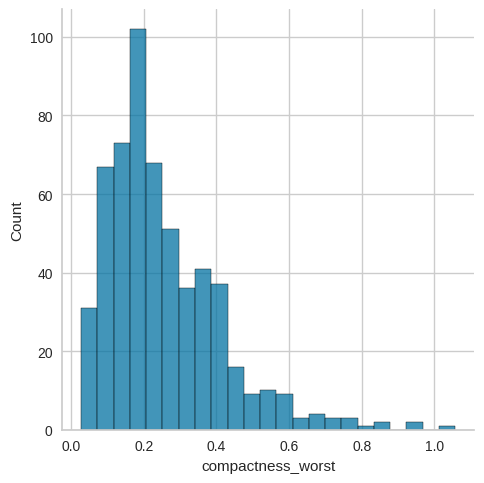

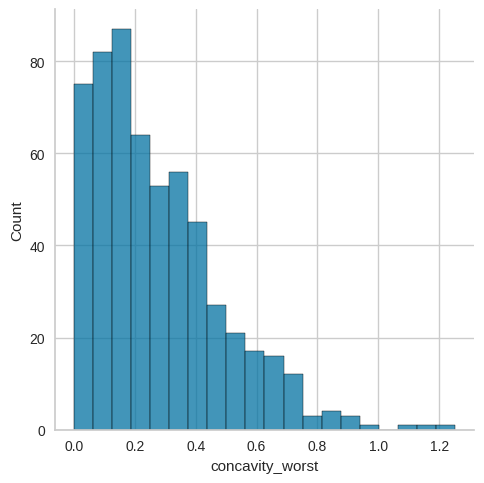

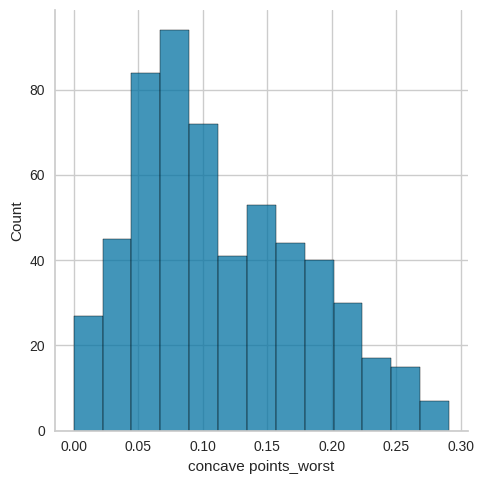

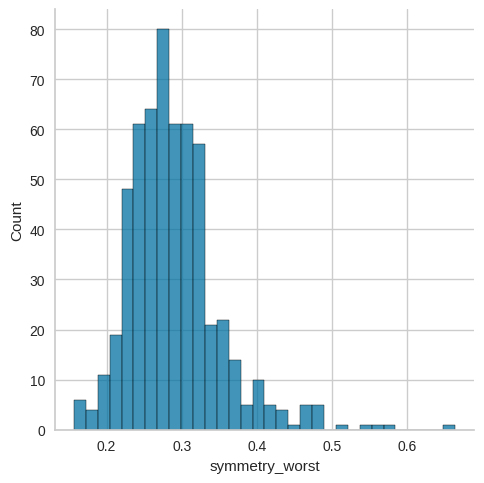

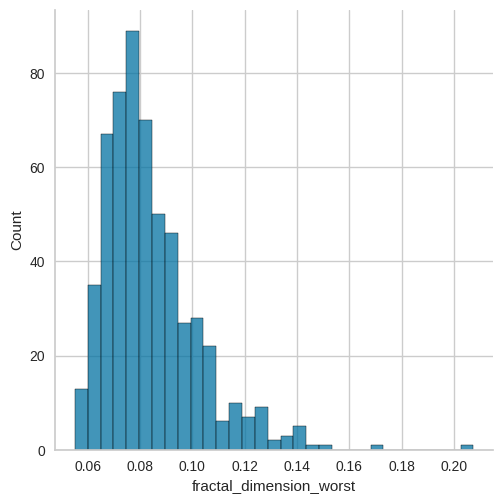

In [25]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=5, figsize= (15,10))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
  sns.displot(df[col], ax=ax[index])
  index=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

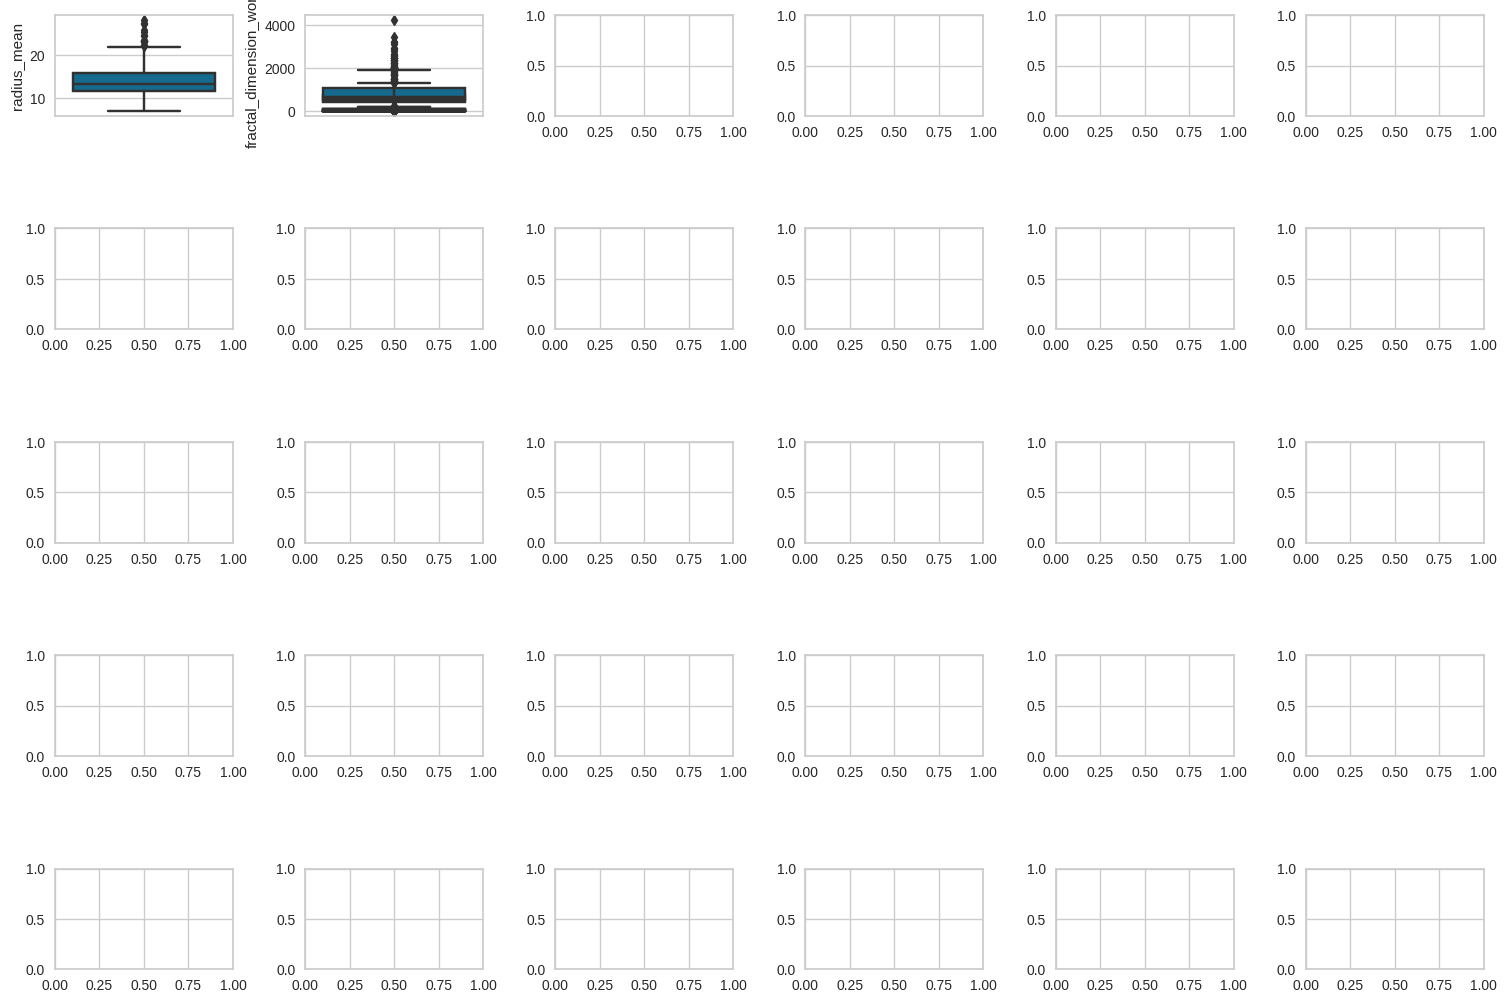

In [20]:
# create box plot
fig, ax = plt.subplots(ncols=6, nrows=5, figsize= (15,10))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
  sns.boxplot(y=col, data=df, ax=ax[index])
  index=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Create and train the model

In [26]:
# setup the data
clf = setup(df, target='diagnosis')

,Description,Value
0,Session id,4165
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"Benign: 0, Malignant: 1"
4,Original data shape,"(569, 31)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Numeric features,30
9,Preprocess,True


In [27]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9649,0.9937,0.9462,0.9603,0.9515,0.9242,0.9261,0.6500
lightgbm,Light Gradient Boosting Machine,0.9624,0.9893,0.9329,0.9660,0.9480,0.9186,0.9203,0.3400
xgboost,Extreme Gradient Boosting,0.9599,0.9890,0.9462,0.9488,0.9463,0.9144,0.9158,0.1980
ridge,Ridge Classifier,0.9524,0.0000,0.8862,0.9867,0.9274,0.8934,0.9013,0.0700
rf,Random Forest Classifier,0.9524,0.9929,0.9057,0.9679,0.9302,0.8948,0.9009,0.8420
qda,Quadratic Discriminant Analysis,0.9524,0.9834,0.9467,0.9304,0.9368,0.8987,0.9008,0.0870
lr,Logistic Regression,0.9499,0.9853,0.9124,0.9512,0.9296,0.8909,0.8933,1.0220
ada,Ada Boost Classifier,0.9499,0.9893,0.9324,0.9348,0.9315,0.8921,0.8945,0.3520
lda,Linear Discriminant Analysis,0.9498,0.9893,0.8719,0.9933,0.9238,0.8875,0.8959,0.1820
gbc,Gradient Boosting Classifier,0.9374,0.9866,0.8990,0.9352,0.9119,0.8639,0.8691,0.5590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4165, verbose=0, warm_start=False)

In [28]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,0.9907,1.0000,0.8824,0.9375,0.8961,0.9010
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9000,0.9800,0.8667,0.8667,0.8667,0.7867,0.7867
5,0.8750,0.9800,0.7333,0.9167,0.8148,0.7222,0.7325
6,0.9750,0.9947,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9750,0.9920,0.9333,1.0000,0.9655,0.9459,0.9473
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
# hyperparameter tunning
best_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,0.9893,1.0000,0.8824,0.9375,0.8961,0.9010
2,0.9750,0.9973,0.9333,1.0000,0.9655,0.9459,0.9473
3,0.9500,1.0000,1.0000,0.8824,0.9375,0.8961,0.9010
4,0.9500,0.9813,0.9333,0.9333,0.9333,0.8933,0.8933
5,0.8500,0.9787,0.6000,1.0000,0.7500,0.6522,0.6956
6,0.9750,0.9947,1.0000,0.9375,0.9677,0.9474,0.9487
7,0.9750,0.9893,0.9333,1.0000,0.9655,0.9459,0.9473
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

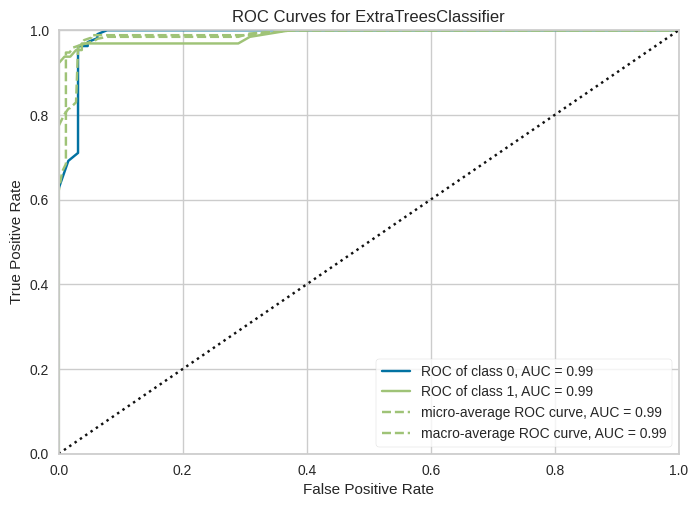

In [34]:
# plot the result
plot_model(estimator=best_model, plot='confusion matrix')